## A brief tutorial of NetworkX

Made for the network science course @ DCC/FCUP

### Main Links

- [NetworkX website](https://networkx.org/) | [Download](https://pypi.org/project/networkx/) | [Reference](https://networkx.org/documentation/stable/reference/index.html) | [Tutorial](https://networkx.org/documentation/stable/tutorial.html) | [Gallery](https://networkx.org/documentation/stable/auto_examples/index.html)

### Importing the library into Python

After starting Python, import the networkx module with (the recommended way):

In [1]:
import networkx as nx

### Creating a graph

Here is a simple initial example:

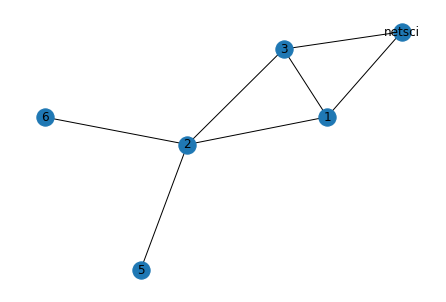

In [2]:
# Create an empty undirected graph
G = nx.Graph()

# Create some nodes
G.add_node(1)            # create a single node
G.add_nodes_from([2,3])  # create nodes from a list
G.add_node("netsci")     # node labels can be of different types

# Create some edges
G.add_edge(1,2)
G.add_edges_from([(2,3),(3,"netsci"), ("netsci", 1), (1,3)])
G.add_edges_from([(2,5),(2,6)]) # if a node does not exist, it is created

# Draw the graph
nx.draw(G, with_labels = True)


Graphs can be of different [types](https://networkx.org/documentation/stable/reference/classes/index.html):

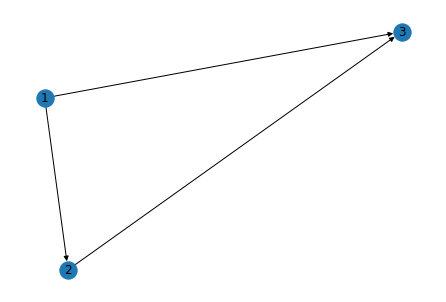

In [3]:
# Here is a simples directed graph
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3), (2,3)])
nx.draw(G, with_labels=True)

Nodes and edges can have attributes:

In [4]:
G = nx.Graph()
G.add_node(1, Name="Pedro", Number=42)
G.add_edge(1, 2, weight=1.5)
G.add_weighted_edges_from([(2, 3, 3.1), (1, 3, 1.2)])

NetworkX graph objects can be created in one of three ways:

- Adding edges and nodes explicitly (what we saw before)
- Graph [generators](https://networkx.org/documentation/stable/reference/generators.html) (standard algorithms to create network topologies)
- Importing data from pre-existing (usually file) sources (see [reading and writing graphs](https://networkx.org/documentation/stable/reference/readwrite/index.html))

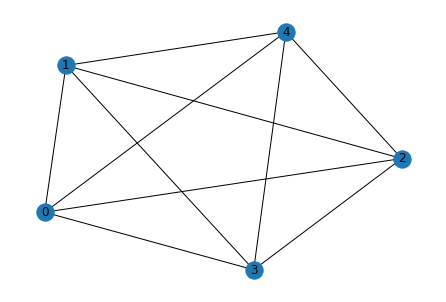

In [5]:
G = nx.complete_graph(5) # a clique of size 5
nx.draw(G, with_labels=True)

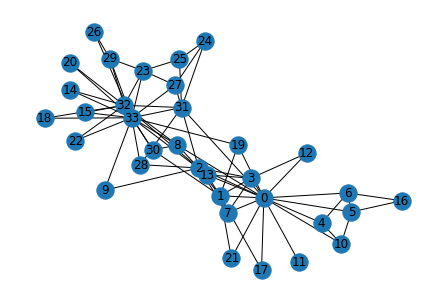

In [6]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)

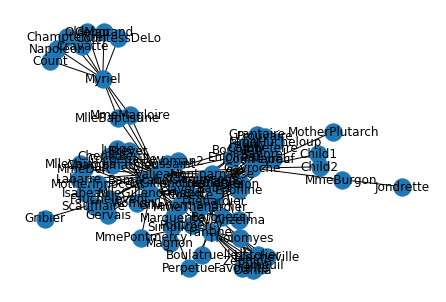

In [7]:
# You can this file at https://github.com/gephi/gephi/wiki/Datasets
G = nx.read_gml("lesmiserables.gml")
nx.draw(G, with_labels=True)

### Manipulating a graph

Graphs are essentially a ["dictionary of dictionaries"](https://networkx.org/documentation/stable/reference/introduction.html)

In [8]:
G = nx.complete_graph(4)

print(G)
print("nodes:", G.nodes)
print("edges:", G.edges)
print("adj:", G.adj)
print("degree:", G.degree)

print("Properties of node 0:")
print("  - neighbors:", list(G.adj[0]));
print("  - degree:", G.degree[0]);

print("Edges of nodes 1 and 2:", G.edges([1,2]))
print("Degrees nodes 1 and 2:", G.degree([1,2]))

print("Neighbors of node 1", G[1]) # same as G.adj[1]


Graph with 4 nodes and 6 edges
nodes: [0, 1, 2, 3]
edges: [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
adj: {0: {1: {}, 2: {}, 3: {}}, 1: {0: {}, 2: {}, 3: {}}, 2: {0: {}, 1: {}, 3: {}}, 3: {0: {}, 1: {}, 2: {}}}
degree: [(0, 3), (1, 3), (2, 3), (3, 3)]
Properties of node 0:
  - neighbors: [1, 2, 3]
  - degree: 3
Edges of nodes 1 and 2: [(1, 0), (1, 2), (1, 3), (2, 0), (2, 3)]
Degrees nodes 1 and 2: [(1, 3), (2, 3)]
Neighbors of node 1 {0: {}, 2: {}, 3: {}}


We can also use [graph operations](https://networkx.org/documentation/stable/tutorial.html#graph-generators-and-graph-operations) to obtain new graphs:

In [9]:
G1 = nx.cycle_graph(4)
G2 = nx.complement(G1)
G3 = nx.subgraph(G1, [1,2,3])

print("G1:", G1.edges)
print("G2:", G2.edges)
print("G3:", G3.edges)

G1: [(0, 1), (0, 3), (1, 2), (2, 3)]
G2: [(0, 2), (1, 3)]
G3: [(1, 2), (2, 3)]


### Graph Analysis

There are many algorithms you can choose to analyzing a graph (see [Algorithms](https://networkx.org/documentation/stable/reference/algorithms/index.html)):

Diameter: 3
Nr Components: 1
Clustering coefficient: {0: 0, 1: 0, 2: 0.3, 3: 0.16666666666666666, 4: 0.4, 5: 1.0, 6: 0.3, 7: 0.3333333333333333, 8: 1.0, 9: 1.0}
Betweenness Centrality: {0: 0.030092592592592587, 1: 0.023148148148148143, 2: 0.2685185185185185, 3: 0.22453703703703698, 4: 0.1921296296296296, 5: 0.0, 6: 0.24537037037037032, 7: 0.07175925925925924, 8: 0.0, 9: 0.0}


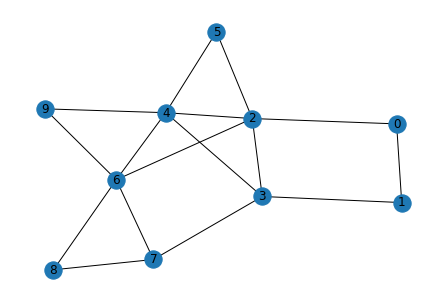

In [10]:
G = nx.barabasi_albert_graph(10,2)
nx.draw(G, with_labels=True)

print("Diameter:", nx.diameter(G))
print("Nr Components:", nx.number_connected_components(G))
print("Clustering coefficient:", nx.clustering(G))
print("Betweenness Centrality:", nx.betweenness_centrality(G))
